# How likely are you to smoke given your personality profile?
According to the Centers for Disease Control and Prevention (CDC) smoking is the leading cause of preventable deaths. Smoking is attributed to cancer, chronic diseases, and increases risks for other problems. Typically most of the adverse health defects are linked to tobacco in cigarettes, but nicotine is what makes smoking addictive. Nicotine is a psychoactive drug, it promotes release of adrenaline and increases the levels of the neurotransmitter dopamine which makes a person feel good. Irritability, lack of focus and sleep, and spike in appetite are just some of the withdrawal symptoms that make quitting smoking difficult.
<br><br>
Studies have shown an individual’s personality profile plays a role in becoming a drug user. In this project different personality features, general information, and different drug usage of an individual will be explored to identify how likely an individual is to smoke by predicting a person’s nicotine consumption risk.
<br><br>
__Disclaimer:__
- All nicotine consumption is assumed to be in the form of tobacco or cigarette consumption.
- Personality profiles are subject to change in as a person matures but have been proven to be valid and reliable assessments.

Data and information retrieved from the UCI Machine Learning Repository. <br>
https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29 <br>
https://www.healthline.com/health/big-five-personality-traits#takeaway

## Features
1. __ID:__ used for reference <br>
2. __Age:__ age of participant and has one of the values <br>
3. __Gender:__ gender of participant <br>
4. __Education:__ level of education of participant <br>
5. __Country:__ country of current residence of participant <br>
6. __Ethnicity:__ ethnicity of participant <br>
7. __Neuroticism:__ Nscore is NEO-FFI-R Neuroticism <br>
8. __Extraversion:__ Escore is NEO-FFI-R Extraversion <br>
9. __Openness to Experience:__ Oscore is NEO-FFI-R Openness to experience <br>
10. __Agreeableness:__ Ascore is NEO-FFI-R Agreeableness <br>
11. __Conscientiousness:__ Cscore is NEO-FFI-R Conscientiousness <br>
12. __Impulsiveness:__ Impulsiveness measured by BIS-11 <br>
13. __Sensation-Seeking:__ SS is sensation seeking measured by ImpSS <br>
14. __Alcohol:__ alcohol consumption <br>
15. __Amphetamines:__ amphetamines consumption <br>
16. __Amyl__ amyl nitrite consumption <br>
17. __Benzos:__ benzodiazepine consumption <br>
18. __Caffeine:__ caffeine consumption <br>
19. __Cannabis:__ cannabis consumption <br>
20. __Chocolate:__ chocolate consumption <br>
21. __Cocaine:__ cocaine consumption <br>
22. __Crack:__ crack consumption <br>
23. __Ecstasy:__ ecstasy consumption <br>
24. __Heroin:__ heroin consumption <br>
25. __Ketamine:__ ketamine consumption <br>
26. __Legal Highs:__ legal highs consumption <br>
27. __LSD:__ lysergic acid diethylamide consumption <br>
28. __Methadone:__ methadone consumption <br>
29. __Mushrooms:__ magic mushrooms consumption <br>
30. __Nicotine:__ nicotine consumption <br>
31. __Semer:__ fictitious drug Semeron consumption <br>
32. __VSA:__ volatile substance abuse consumption <br> <br>

In [1]:
#Import necessary libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns

In [2]:
df = pd.read_csv('drug_consumption.csv', index_col=0)

All drug columns are multilevel categorical values, for simplicities sake the "Never used" and "Used over a decade ago" will be considered as "Non-user" and all other classes will become "User"

In [3]:
bi_use = ['Non-user', 'Non-user','User','User','User','User','User']
multi_use = ['Never used','Used over a decade ago','Used in last decade','Used in last year','Used in last month','Used in last week','Used in last day']

df.iloc[:,13:32] = df.iloc[:,13:32].replace(multi_use, bi_use)

## Popularity of drug consumption

In [4]:
drugs = df.iloc[:,13:32]
drugs_ls = drugs.columns
drugs_usage = pd.melt(drugs, value_vars=drugs_ls, var_name='Drugs', value_name='Usage')

In [5]:
drugs_grouped_usage = drugs_usage.groupby('Drugs')['Usage'].value_counts(normalize=True).sort_values(ascending=False)
drug = [i for i, j in drugs_grouped_usage.index if j=='User']
usg_percent = [round(drugs_grouped_usage[i][j]*100,2) for i, j in drugs_grouped_usage.index if j=='User']

[Text(0.5, 0, 'Percentage of Consumption')]

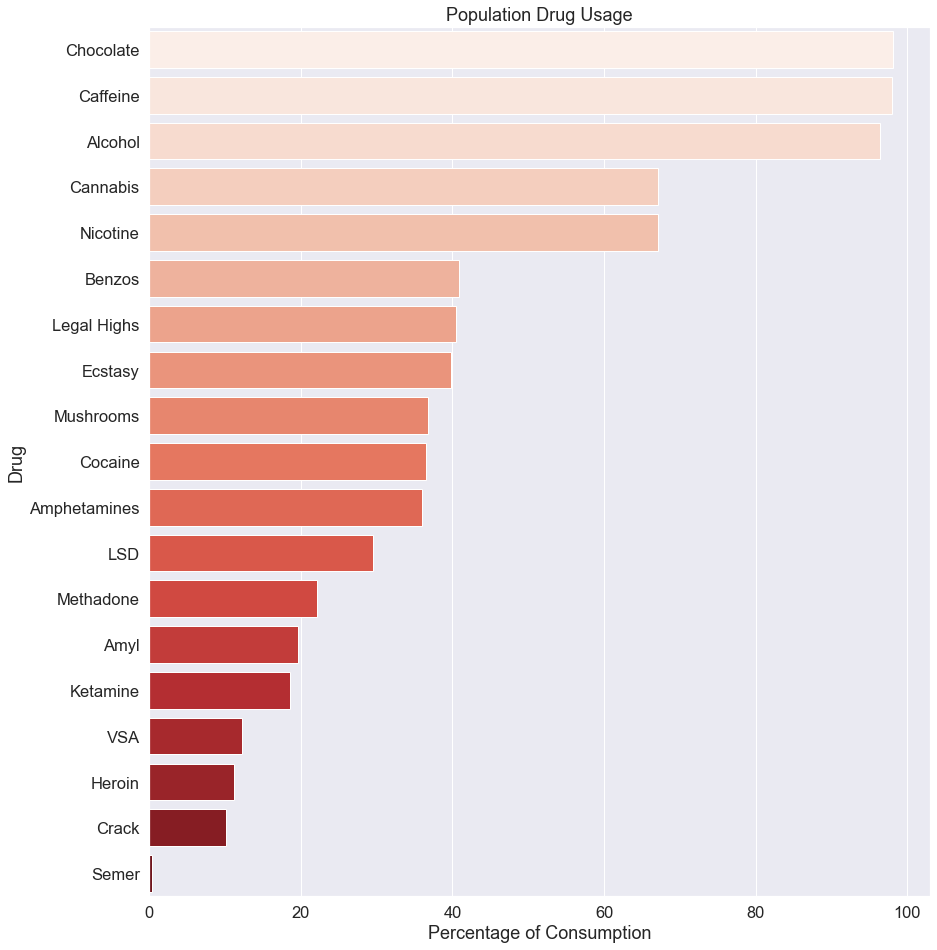

In [6]:
plt.figure(figsize=(14,16))
sns.set(font_scale=1.5)
plt.ylabel('Drug')
plt.title('Population Drug Usage')
sns.barplot(x=usg_percent, y=drug, palette='Reds').set(xlabel='Percentage of Consumption')

Nicotine is the fifth most consumed drug with a usage percentage of about 65%. Semer is virtually not consumed at all by the population which makes sense as it is not a real drug and which was introduced by researchers to identify over claimers.

In [7]:
#drop semer and ethnicity columns of dataset not indicative of population
df = df.drop(columns=['Ethnicity', 'Semer'])

## Are younger people more likely to smoke nicotine products?

In [8]:
#Should i merge age groups 55-64 and 65+ into one group thats just 55+?
#df.Age.value_counts()

In [9]:
df['Age'] = df['Age'].replace(dict.fromkeys(['55-64','65+'], '55+'))

In [10]:
nico_age = df.loc[:,['Age','Nicotine']]
nico_age_grouped = nico_age.groupby('Age')['Nicotine'].value_counts(normalize=True).sort_values(ascending=False)
age = [i for i, j in nico_age_grouped.index if j=='User']
usg_percent = [round(nico_age_grouped[i][j]*100,2) for i, j in nico_age_grouped.index if j=='User']

[Text(0, 0.5, 'Percentage')]

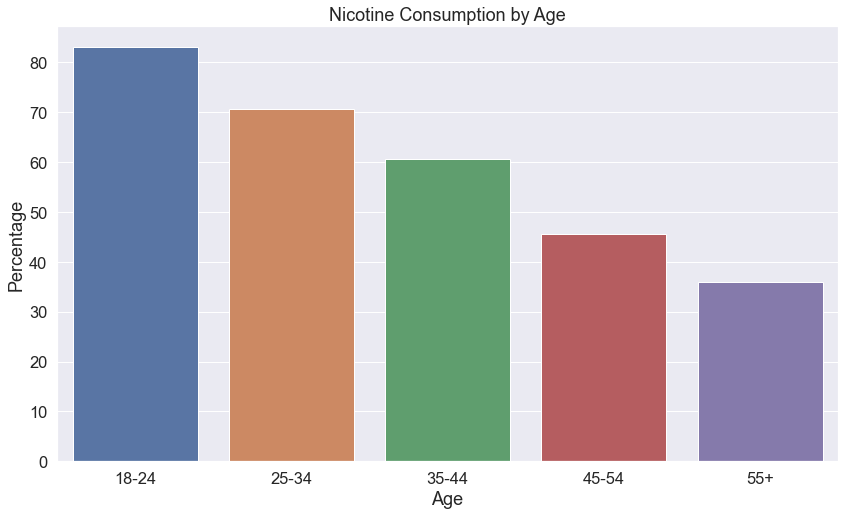

In [11]:
plt.figure(figsize=(14,8))
sns.set(font_scale=1.5)
plt.xlabel('Age')
plt.title('Nicotine Consumption by Age')
sns.barplot(x=age, y=usg_percent).set(ylabel='Percentage')

In [12]:
#See what categorical features are significantly correlated to Nicotine
#from scipy.stats import chi2_contingency
#from scipy.stats import chi2
def nico_chi_square_test(feat):
    table = pd.crosstab(df[feat], df['Nicotine'])
    stat, p, dof, expected = ss.chi2_contingency(table.values)

    if p < 0.05:
        print(feat, 'and nicotine consumption are statistically correlated.')
        print('P-value:', p)
    else:
        print(feat, 'and nicotine consumption are not statiscally correlated.')

In [13]:
nico_chi_square_test('Age')

Age and nicotine consumption are statistically correlated.
P-value: 8.861853241123603e-41


Younger people are more likely to consume nicotine products than older folks. 

## Do men smoke more than women?

In [14]:
#df.Gender.value_counts()

In [15]:
nico_gen = df.loc[:,['Gender','Nicotine']]
nico_gen_grouped = nico_gen.groupby('Gender')['Nicotine'].value_counts(normalize=True).sort_values(ascending=False)
gen = [i for i, j in nico_gen_grouped.index if j=='User']
usg_percent = [round(nico_gen_grouped[i][j]*100,2) for i, j in nico_gen_grouped.index if j=='User']

[Text(0, 0.5, 'Percentage')]

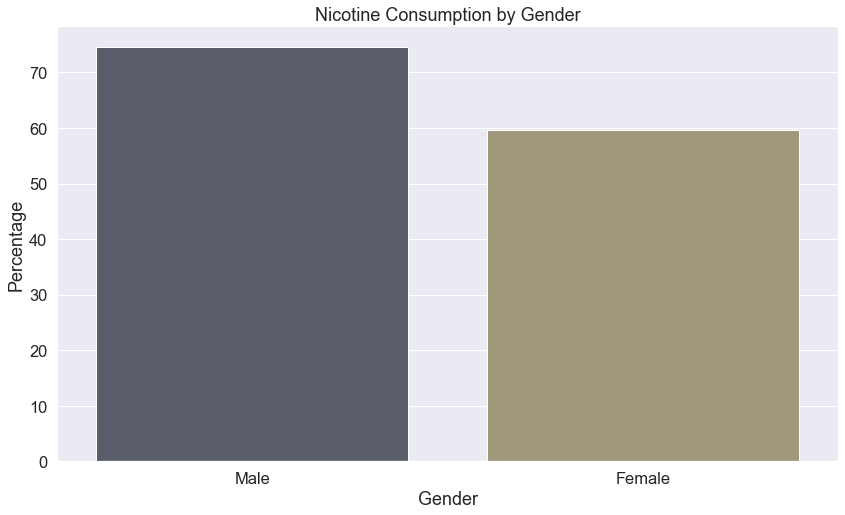

In [16]:
plt.figure(figsize=(14,8))
sns.set(font_scale=1.5)
plt.xlabel('Gender')
plt.title('Nicotine Consumption by Gender')
sns.barplot(x=gen, y=usg_percent, palette='cividis').set(ylabel='Percentage')

In [17]:
nico_chi_square_test('Gender')

Gender and nicotine consumption are statistically correlated.
P-value: 6.122005336608355e-12


In [18]:
#Melt and seperate features of interest
gender_big5 = df[df['Nicotine']=='User'].loc[:,['Gender','Neuroticism','Extraversion','Openness_to_Experience','Agreeableness','Conscientiousness']]

gender_big5_melted = pd.melt(gender_big5, id_vars=['Gender'], value_vars=['Neuroticism','Extraversion','Openness_to_Experience','Agreeableness','Conscientiousness'], var_name='Big 5 Personality Traits', value_name='Score')

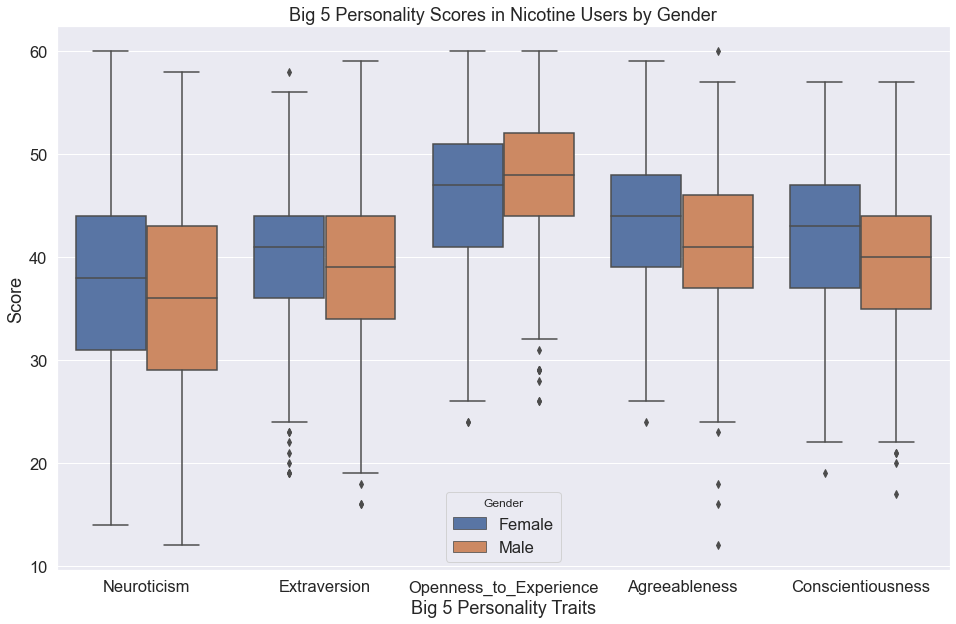

In [19]:
plt.figure(figsize=(16,10))
sns.set(font_scale=1.5)
plt.title('Big 5 Personality Scores in Nicotine Users by Gender')
sns.boxplot(x="Big 5 Personality Traits", y="Score", hue='Gender', data=gender_big5_melted)

In [20]:
#We can perform a t-test and calculate p-values to verify which traits are statistically significant to nicotine consumption
big5 = ['Neuroticism','Extraversion','Openness_to_Experience','Agreeableness','Conscientiousness']

for trait in big5:
    p_trait = gender_big5_melted[gender_big5_melted['Big 5 Personality Traits'] == trait]
    males = p_trait.loc[p_trait['Gender'] == 'Male', 'Score']
    females = p_trait.loc[p_trait['Gender'] == 'Female', 'Score']

    stat, p = ss.ttest_ind(males, females) 
    
    if p < 0.05: #using 95% confidence interval, can be adjusted for different values
        print("There is a statistically significant difference between males and females nicotine users who have the", trait, "trait.\nP-value:{p}.\n".format(p =p))
    else:
        print(trait, "is not statistically significant.")
        print('P-value:',p,'\n')

There is a statistically significant difference between males and females nicotine users who have the Neuroticism trait.
P-value:0.006388315316280716.

There is a statistically significant difference between males and females nicotine users who have the Extraversion trait.
P-value:0.007168370737260897.

There is a statistically significant difference between males and females nicotine users who have the Openness_to_Experience trait.
P-value:0.00016601614907571082.

There is a statistically significant difference between males and females nicotine users who have the Agreeableness trait.
P-value:1.6046033054297335e-09.

There is a statistically significant difference between males and females nicotine users who have the Conscientiousness trait.
P-value:8.380441706972237e-08.



Men indeed are more likely to smoke than women. Among nicotine users men appear to have only scored higher on the openness to experience trait than women.

## Are people with degrees less likely to smoke than those without? 

In [21]:
#df.Education.value_counts()

In [22]:
df['Education'] = df['Education'].replace(dict.fromkeys(['Left school at 17','Left school at 16','Left school before 16'], 'Left school at 17 or younger'))

In [23]:
nico_edu = df.loc[:,['Education','Nicotine']]
nico_edu_grouped = nico_edu.groupby('Education')['Nicotine'].value_counts(normalize=True).sort_values(ascending=False)
edu = [i for i, j in nico_edu_grouped.index if j=='User']
usg_percent = [round(nico_edu_grouped[i][j]*100,2) for i, j in nico_edu_grouped.index if j=='User']

[Text(0.5, 0, 'Percentage')]

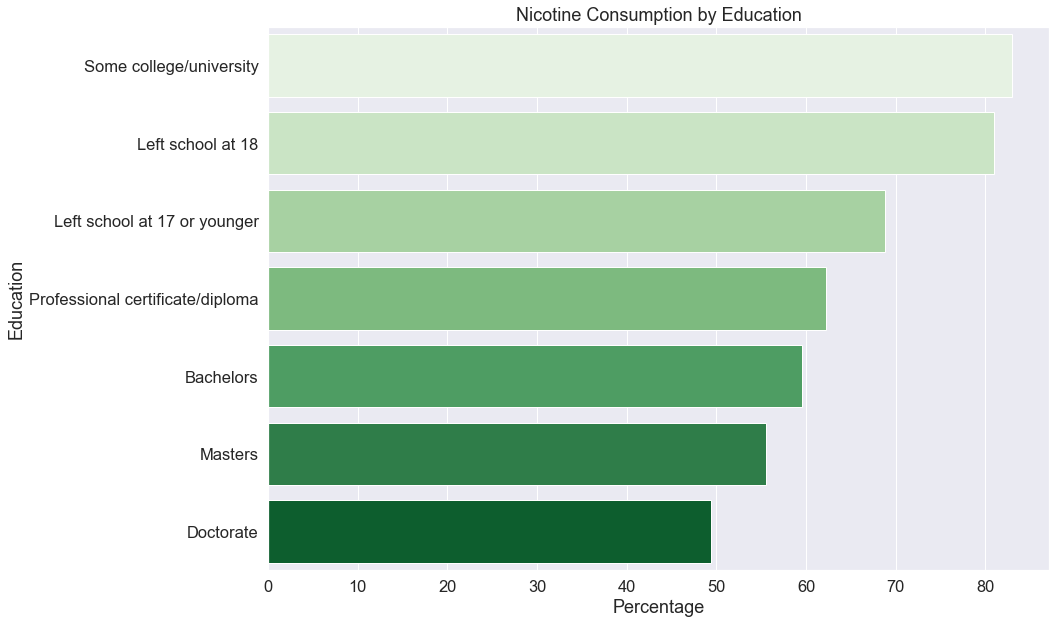

In [24]:
plt.figure(figsize=(14,10))
sns.set(font_scale=1.5)
plt.ylabel('Education')
plt.title('Nicotine Consumption by Education')
sns.barplot(x=usg_percent, y=edu, palette='Greens').set(xlabel='Percentage')

In [25]:
nico_chi_square_test('Education')

Education and nicotine consumption are statistically correlated.
P-value: 7.99317958387199e-22


As people become more educated they are less likely to smoke or continue smoking. However, on average more than 50% of all people with a bachelors and masters do smoke and close to half of people with doctorates smoke based on the given sample population.

## Does the country you live in affect the amount of nicotine consumption?

In [26]:
#df.Country.value_counts()

In [27]:
df['Country'] = df['Country'].replace(dict.fromkeys(['Australia','Republic of Ireland','New Zealand'], 'Other'))

In [28]:
nico_cntry = df.loc[:,['Country','Nicotine']]
nico_cntry_grouped = nico_cntry.groupby('Country')['Nicotine'].value_counts(normalize=True).sort_values(ascending=False)
cntry = [i for i, j in nico_cntry_grouped.index if j=='User']
usg_percent = [round(nico_cntry_grouped[i][j]*100,2) for i, j in nico_cntry_grouped.index if j=='User']

[Text(0.5, 0, 'Percentage')]

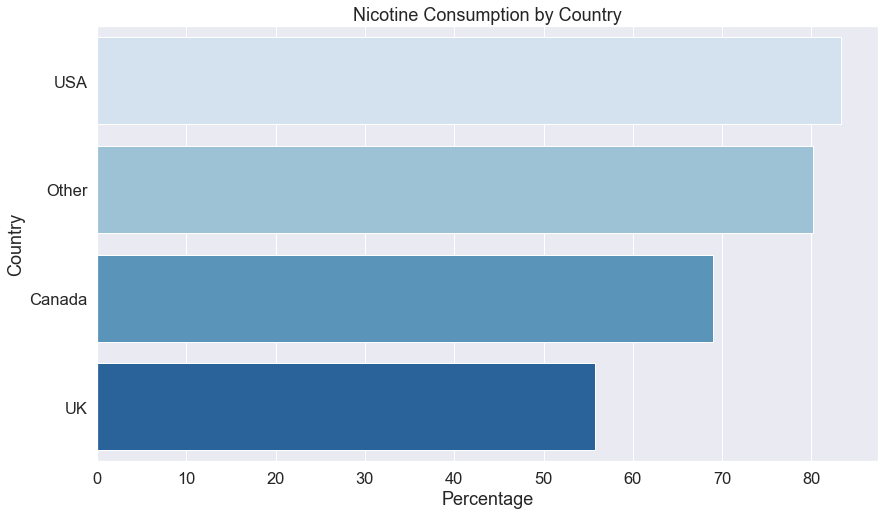

In [29]:
plt.figure(figsize=(14,8))
sns.set(font_scale=1.5)
plt.ylabel('Country')
plt.title('Nicotine Consumption by Country')
sns.barplot(x=usg_percent, y=cntry, palette='Blues').set(xlabel='Percentage')

In [30]:
nico_chi_square_test('Country')

Country and nicotine consumption are statistically correlated.
P-value: 1.0623180960932882e-30


Americans are more likely to be smokers than people in other countries.

In [31]:
#Melt and seperate features of interest
country_big5 = df[df['Nicotine']=='User'].loc[:,['Country','Neuroticism','Extraversion','Openness_to_Experience','Agreeableness','Conscientiousness']]

country_big5_melted = pd.melt(country_big5, id_vars=['Country'], value_vars=['Neuroticism','Extraversion','Openness_to_Experience','Agreeableness','Conscientiousness'], var_name='Big 5 Personality Traits', value_name='Score')

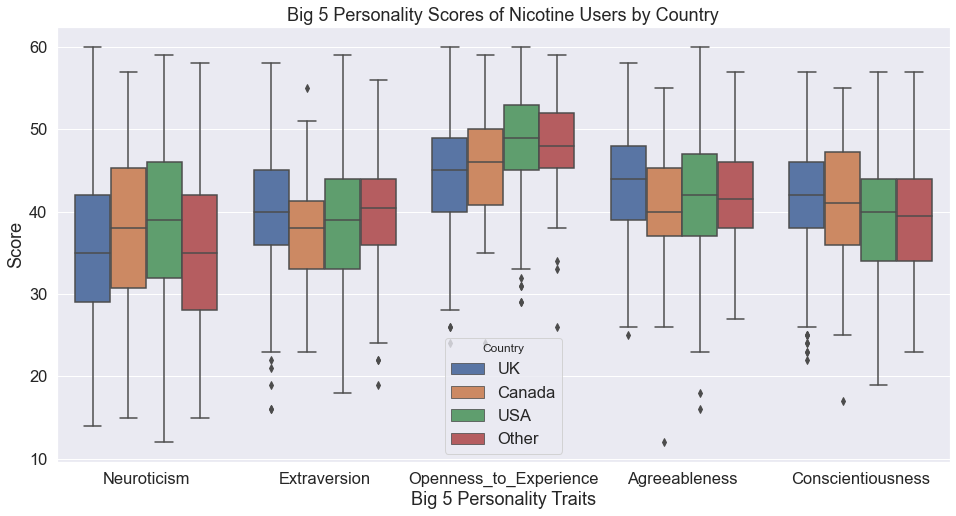

In [32]:
plt.figure(figsize=(16,8))
sns.set(font_scale=1.5)
plt.title('Big 5 Personality Scores of Nicotine Users by Country')
sns.boxplot(x="Big 5 Personality Traits", y="Score", hue='Country', data=country_big5_melted)

In [33]:
for trait in big5:
    p_trait = country_big5_melted[country_big5_melted['Big 5 Personality Traits'] == trait]
    uk = p_trait.loc[p_trait['Country'] == 'UK', 'Score']
    usa = p_trait.loc[p_trait['Country'] == 'USA', 'Score']
    canada = p_trait.loc[p_trait['Country'] == 'Canada', 'Score']
    other = p_trait.loc[p_trait['Country'] == 'Other', 'Score']

    stat, p = ss.f_oneway(uk, usa, canada, other) 
    
    if p < 0.05: #using 95% confidence interval, can be adjusted for different values
        print("There is a statistically significant difference between nicotine users in different countries who have the", trait, "trait.\nP-value:{p}.\n".format(p =p))
    else:
        print(trait, "is not statistically significant among nicotine users in different countries.")
        print('P-value:',p,'\n')

There is a statistically significant difference between nicotine users in different countries who have the Neuroticism trait.
P-value:3.767316418765886e-05.

There is a statistically significant difference between nicotine users in different countries who have the Extraversion trait.
P-value:0.00040868661374410817.

There is a statistically significant difference between nicotine users in different countries who have the Openness_to_Experience trait.
P-value:1.3405428259239688e-28.

There is a statistically significant difference between nicotine users in different countries who have the Agreeableness trait.
P-value:4.681405331407588e-05.

There is a statistically significant difference between nicotine users in different countries who have the Conscientiousness trait.
P-value:2.855094558752226e-08.



Among nicotine users Americans appear to have the opennes to experience and neuroticism traits. Whereas people from UK scored higher for aggreableness and conscientiousness. Canadians appear to be slightly more introverted people than people from other countries.

## Which big 5 personality traits are the most common in people who smoke?

In [34]:
#Melt and seperate features of interest
nico_big5 = df.loc[:,['Neuroticism','Extraversion','Openness_to_Experience','Agreeableness','Conscientiousness','Nicotine']]

nico_big5_melted = pd.melt(nico_big5, id_vars=['Nicotine'], value_vars=['Neuroticism','Extraversion','Openness_to_Experience','Agreeableness','Conscientiousness'], var_name='Big 5 Personality Traits', value_name='Score')

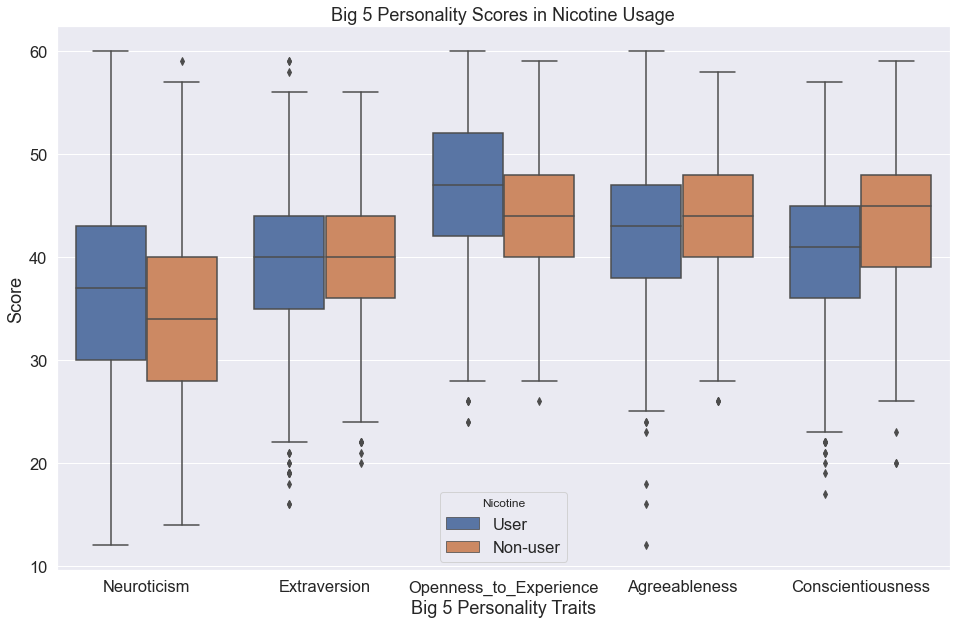

In [35]:
plt.figure(figsize=(16,10))
sns.set(font_scale=1.5)
plt.title('Big 5 Personality Scores in Nicotine Usage')
sns.boxplot(x="Big 5 Personality Traits", y="Score", hue='Nicotine', data=nico_big5_melted)

In [36]:
#We can perform a t-test and calculate p-values to verify which traits are statistically significant to nicotine consumption
for trait in big5:
    p_trait = nico_big5_melted[nico_big5_melted['Big 5 Personality Traits'] == trait]
    users = p_trait.loc[p_trait['Nicotine'] == 'User', 'Score']
    non_users = p_trait.loc[p_trait['Nicotine'] == 'Non-user', 'Score']

    stat, p = ss.ttest_ind(users, non_users) 
    
    if p < 0.05: #using 95% confidence interval, can be adjusted for different values
        print("There is a statistically significant difference between users and non-users of nicotine who have the", trait, "trait.\nP-value:{p}.\n".format(p =p))
    else:
        print(trait, "is not statistically significant.")
        print('P-value:',p,'\n')

There is a statistically significant difference between users and non-users of nicotine who have the Neuroticism trait.
P-value:2.0670744438881825e-08.

Extraversion is not statistically significant.
P-value: 0.5913074208312263 

There is a statistically significant difference between users and non-users of nicotine who have the Openness_to_Experience trait.
P-value:7.606811100520037e-20.

There is a statistically significant difference between users and non-users of nicotine who have the Agreeableness trait.
P-value:3.3917035367820075e-07.

There is a statistically significant difference between users and non-users of nicotine who have the Conscientiousness trait.
P-value:6.799842513602043e-19.



People who have higher neuorticism and openness to experience scores are more likely to be nicotine users than those with high agreeableness and conscientioussness scores. Whether a person is extraverted or introverted is not really indicative of nicotine usage.

## Are sensation seekers and impulsive people more likely to smoke?

In [37]:
nico_impSS = df.loc[:,['Impulsiveness','Sensation-Seeking','Nicotine']]

nico_impSS_melted = pd.melt(nico_impSS, id_vars=['Nicotine'], value_vars=['Impulsiveness','Sensation-Seeking'], var_name='Impulsiveness/SS', value_name='Score')

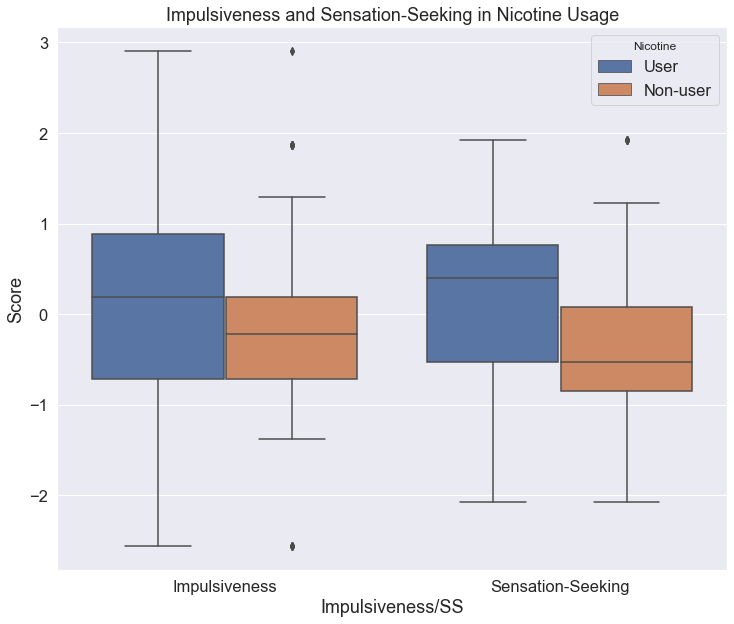

In [38]:
plt.figure(figsize=(12,10))
sns.set(font_scale=1.5)
plt.title('Impulsiveness and Sensation-Seeking in Nicotine Usage')
sns.boxplot(x="Impulsiveness/SS", y="Score", hue='Nicotine', data=nico_impSS_melted)

In [39]:
#We can perform a t-test and calculate p-values to verify which traits are statistically significant to nicotine consumption

impSS = ['Impulsiveness','Sensation-Seeking']

for trait in impSS:
    p_trait = nico_impSS_melted[nico_impSS_melted['Impulsiveness/SS'] == trait]
    users = p_trait.loc[p_trait['Nicotine'] == 'User', 'Score']
    non_users = p_trait.loc[p_trait['Nicotine'] == 'Non-user', 'Score']

    stat, p = ss.ttest_ind(users, non_users) 
    
    if p < 0.05: #using 95% confidence interval, can be adjusted for different values
        print("There is a statistically significant difference between users and non-users of nicotine who have the", trait, "trait.\nP-value:{p}.\n".format(p =p))
    else:
        print(trait, "is not statistically significant.")
        print(p,'\n')

There is a statistically significant difference between users and non-users of nicotine who have the Impulsiveness trait.
P-value:5.051142879790059e-21.

There is a statistically significant difference between users and non-users of nicotine who have the Sensation-Seeking trait.
P-value:8.746025463241486e-41.



Not surprisignly, sensation seekers and impulsive people tend to be smokers than those who don\'t have those qualities.

## Which features have the strongest correlation to nicotine usage?

In [40]:
#Drop id column
data = df.drop(columns='ID')

#Seperate numerical and categorical features
numerical = list(data.select_dtypes(exclude='object').columns)
categorical = list(data.select_dtypes(include='object').columns)

In [41]:
#Seperate binomial from multilevel categorical values
multi_cat = [i for i in data.iloc[:,0:4].columns]
bino_cat = [i for i in data.iloc[:,11:29].columns]

multi_cat.remove('Gender')
bino_cat.append('Gender')

In [42]:
#Replace 'User' strings into 0, 1 to conduct point biserial testing
data[bino_cat] = data[bino_cat].replace(('Non-user','User'),(0,1))
data['Gender'] = data['Gender'].replace(('Female','Male'),(0,1))

In [43]:
#this function is used to get correlation between categorical features
# extracted from https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [44]:
#this function is used for correlation between multi-level categorical features (non-binomial) and numerical features
# extracted from https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

In [45]:
columns = data.columns
corr = pd.DataFrame(index=columns, columns=columns)

for i in range(0, len(columns)):
    for j in range(i, len(columns)):                   
                    
            if i == j:
                corr_factor = 1.0
            
            elif (columns[i] in categorical) and ((columns[j] in categorical)):
                corr_factor =  cramers_v(data[columns[j]], data[columns[i]])
                table = pd.crosstab(data[columns[j]], data[columns[i]])
                chi2, pvalue, dof, expected = ss.chi2_contingency(table.values)
                if pvalue > 0.05:
                    corr_factor = np.nan
            
            elif (columns[i] in numerical) and (columns[j] in numerical):
                corr_factor, pvalue = ss.pearsonr(data[columns[j]], data[columns[i]])
                if pvalue > 0.05:
                    corr_factor = np.nan
            
            elif (columns[i] in numerical) and ((columns[j] in multi_cat)):
                corr_factor =  correlation_ratio(data[columns[j]], data[columns[i]])
                
            elif (columns[i] in multi_cat) and ((columns[j] in numerical)):
                corr_factor =  correlation_ratio(data[columns[i]], data[columns[j]])
            
            else:
                #if categorical variable is binomial use points biserial
                corr_factor, pvalue = ss.pointbiserialr(data[columns[j]], data[columns[i]])
                
                if pvalue > 0.05:
                    corr_factor = np.nan
                
            corr.loc[columns[j],columns[i]] = corr_factor

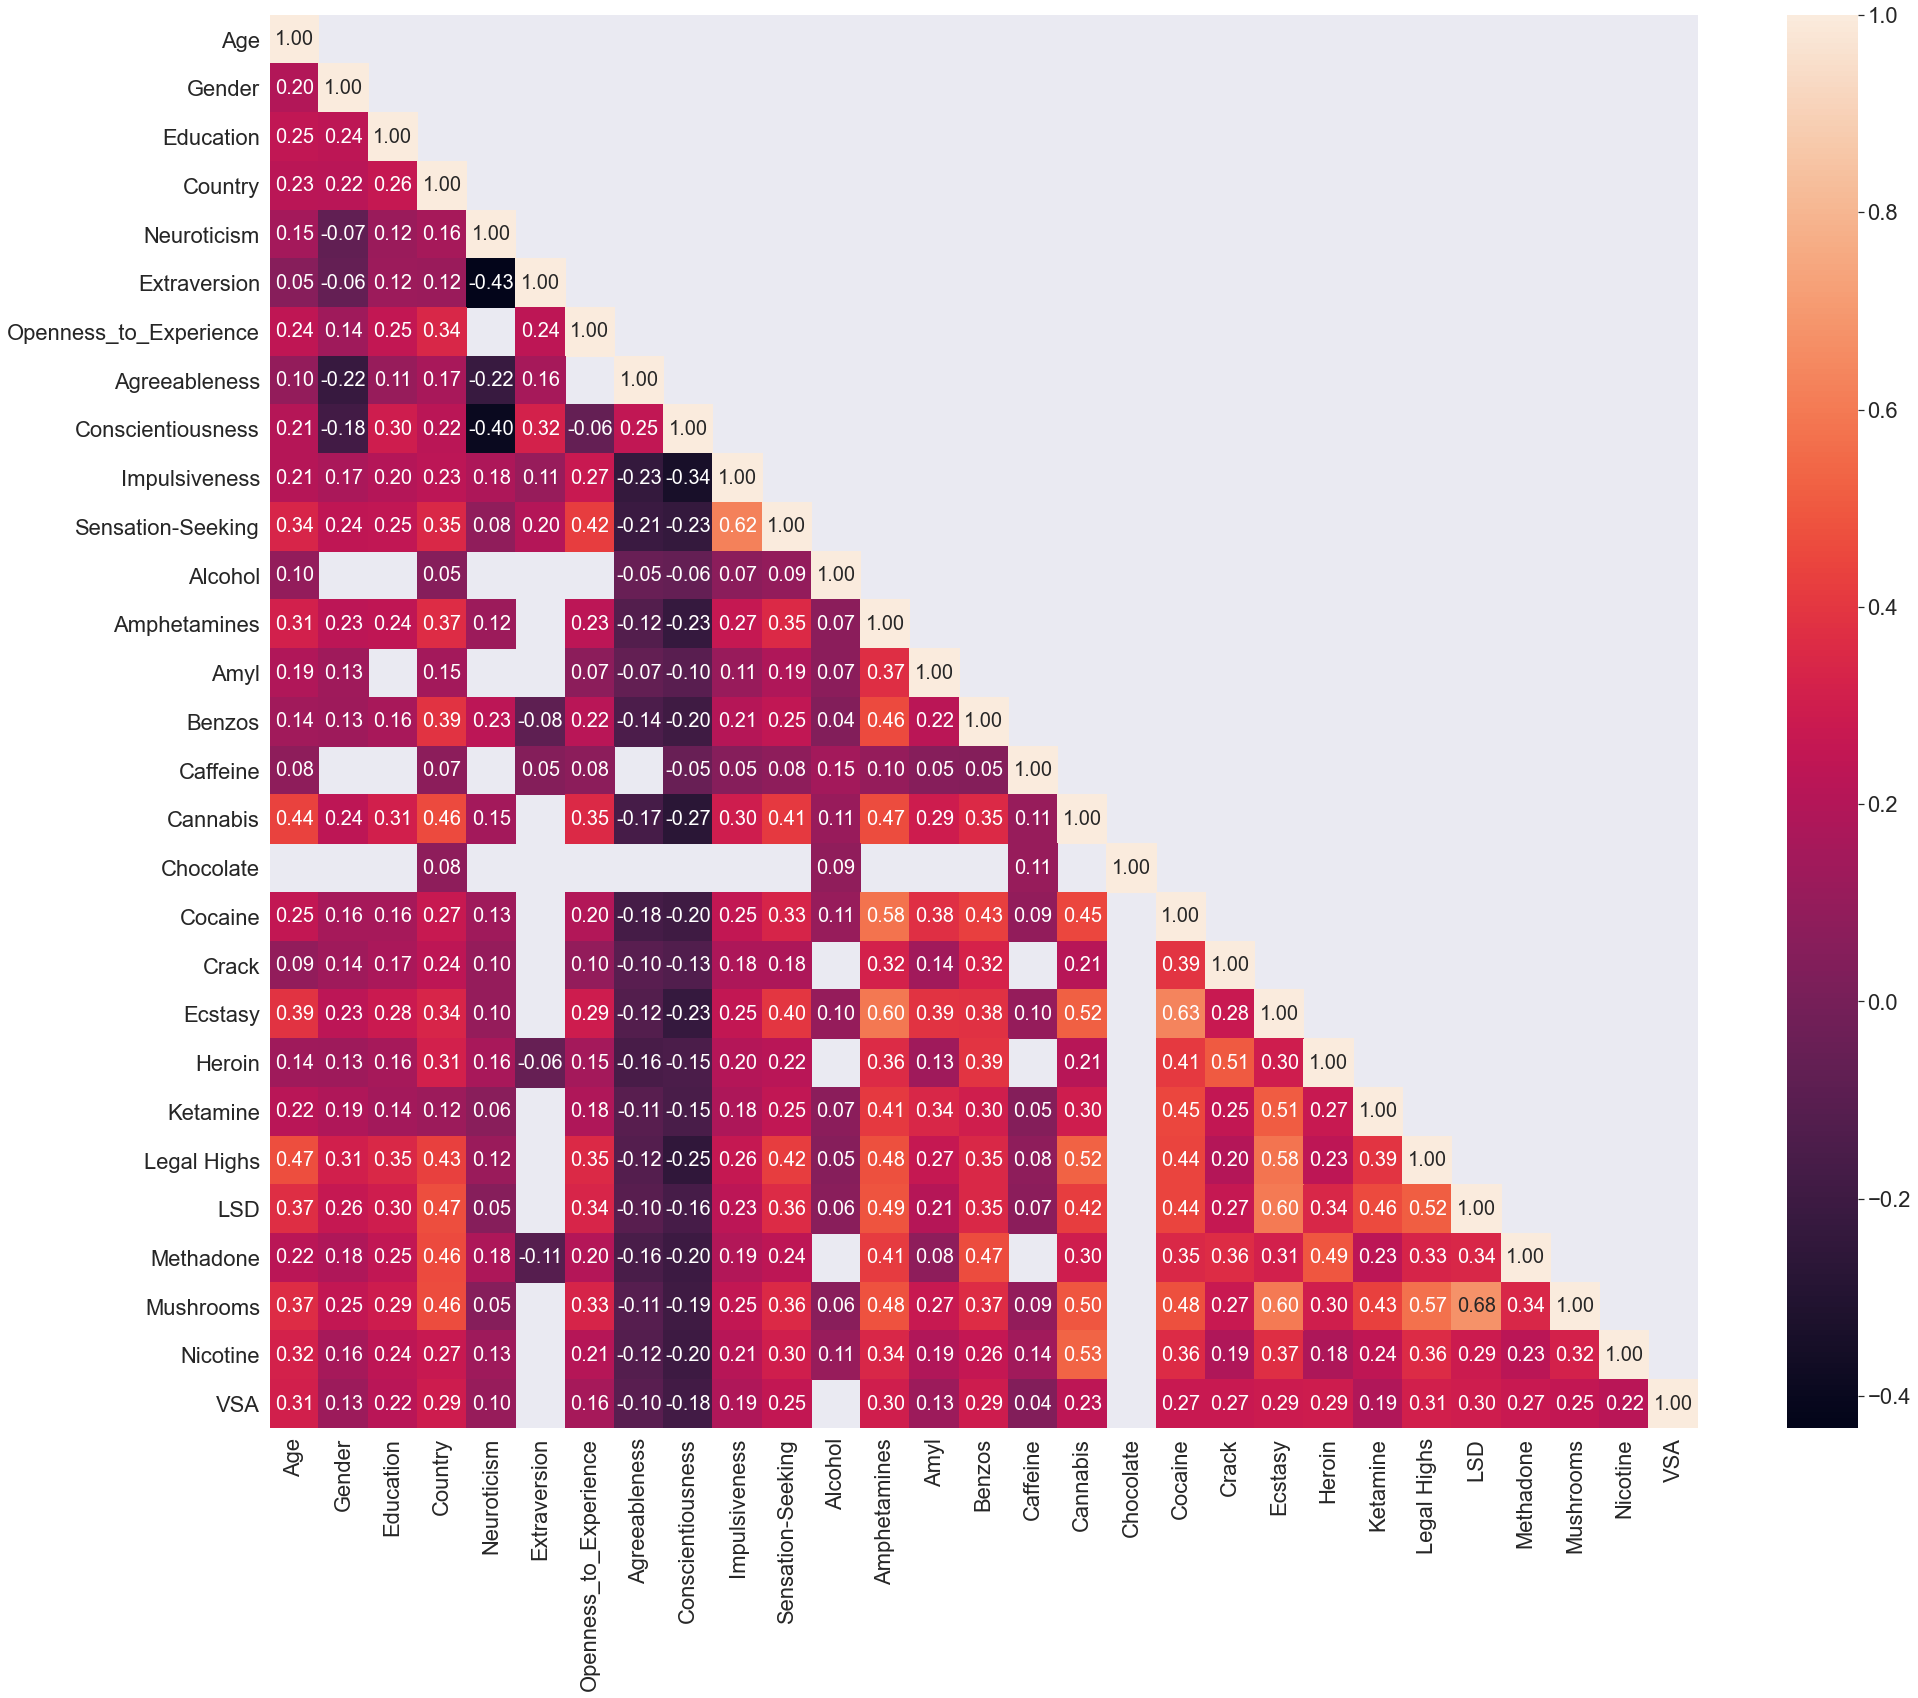

In [46]:
corr.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(32,26))
sns.set(font_scale=2) 
sns.heatmap(corr,annot=True,fmt='.2f',annot_kws={"size": 20})
plt.show()

Other drug usage is a good indicator of nicotine consumption, the personality traits associated with nicotine consumption are openness to experience, impulsiveness and sensation seeking.